<a href="https://colab.research.google.com/github/nabilahaffryda/PVCK_Genap_2021/blob/main/UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import glob
from math import sqrt

Mounted at /content/drive


In [30]:
# Load Image
def LoadLeafImage(leafName):
  path = '/content/drive/MyDrive/PVCK/Leaf Images 04/' + leafName + '/*.jpg'
  leaf_img = []
  for img in glob.glob(path):
    n = cv.imread(img, 0)
    leaf_img.append(n)
  return leaf_img

# Thresholding
def ThresholdLeafImage(listOfLeafImage):
  leaf_thresh = []
  ret = []
  for i in range(0, len(listOfLeafImage)):
    n_ret, n_leaf_thresh = cv.threshold(listOfLeafImage[i], 127, 255, cv.THRESH_BINARY)
    ret.append(n_ret)
    leaf_thresh.append(n_leaf_thresh)
  return leaf_thresh

# Closing
def CloseLeafImage(listOfLeafImage):
  kernel = np.ones((5,5),np.uint8)
  leaf_close = []
  for j in range(0, len(listOfLeafImage)):
    leaf_closing = cv.morphologyEx(listOfLeafImage[j], cv.MORPH_CLOSE, kernel)
    leaf_close.append(leaf_closing)
  return leaf_close

# Find Contours
def FindLeafImageContour(listOfLeafImage):
  leaf_contour = []
  leaf_hierarchy = []
  for k in range(0, len(listOfLeafImage)):
    contours,hierarchy = cv.findContours(listOfLeafImage[k], cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    leaf_contour.append(contours)
    leaf_hierarchy.append(hierarchy)
  return leaf_contour

# Extracting Features (Area)
def ExtractLeafImageFeaturesArea(listOfLeafImage):
  leaf_area = []
  for l in range(0, len(listOfLeafImage)):
    cnt = listOfLeafImage[l][0]
    area = cv.contourArea(cnt)
    leaf_area.append(area)
  return leaf_area

# Extracting Features (Perimeter)
def ExtractLeafImageFeaturesPerimeter(listOfLeafImage):
  leaf_perimeter = []
  for l in range(0, len(listOfLeafImage)):
    cnt = listOfLeafImage[l][0]
    area = cv.arcLength(cnt,True)
    leaf_perimeter.append(area)
  return leaf_perimeter

# Calculate Average of Area
def CalculateAverageOfArea(listOfLeafImage):
  averageOfArea = sum(listOfLeafImage) / len(listOfLeafImage)
  return averageOfArea

# Calculate Average of Perimeter
def CalculateAverageOfPerimeter(listOfLeafImage):
  averageOfPerimeter = sum(listOfLeafImage) / len(listOfLeafImage)
  return averageOfPerimeter

# Calculate Distance
def CalculateDistance(area, perimeter, area_1, area_2, area_3, perimeter_1, perimeter_2, perimeter_3):
  closestDistance = 0
  result = ''
  dist_1 = sqrt((pow((area-area_1),2) + pow((perimeter - perimeter_1),2)))
  dist_2 = sqrt((pow((area-area_2),2) + pow((perimeter - perimeter_2),2)))
  dist_3 = sqrt((pow((area-area_3),2) + pow((perimeter - perimeter_3),2)))
  dist_dict = {
      'Cornus_Controversa' : dist_1,
      'Eucalyptus_Glaucescens' : dist_2,
      'Fagus_Sylvatica': dist_3
  }
  dist_list = [dist_1, dist_2, dist_3]
  closestDistance = min(dist_list)
  for leafName, leafDistance in dist_dict.items():
    if(closestDistance == leafDistance):
      result = leafName
  return result

In [31]:
# Training

# Eucalyptus_Glaucescens
Eucalyptus_Glaucescens_List =  LoadLeafImage('Eucalyptus_Glaucescens')
Eucalyptus_Glaucescens_Thersh = ThresholdLeafImage(Eucalyptus_Glaucescens_List)
Eucalyptus_Glaucescens_Close = CloseLeafImage(Eucalyptus_Glaucescens_Thersh)
Eucalyptus_Glaucescens_Contour = FindLeafImageContour(Eucalyptus_Glaucescens_Close)
Eucalyptus_Glaucescens_Area = ExtractLeafImageFeaturesArea(Eucalyptus_Glaucescens_Contour)
Eucalyptus_Glaucescens_Average_Area = CalculateAverageOfArea(Eucalyptus_Glaucescens_Area)
Eucalyptus_Glaucescens_Perimeter = ExtractLeafImageFeaturesPerimeter(Eucalyptus_Glaucescens_Contour)
Eucalyptus_Glaucescens_Average_Perimeter = CalculateAverageOfPerimeter(Eucalyptus_Glaucescens_Perimeter)

# Cornus_Controversa
Cornus_Controversa_List =  LoadLeafImage('Cornus_Controversa')
Cornus_Controversa_Thersh = ThresholdLeafImage(Cornus_Controversa_List)
Cornus_Controversa_Close = CloseLeafImage(Cornus_Controversa_Thersh)
Cornus_Controversa_Contour = FindLeafImageContour(Cornus_Controversa_Close)
Cornus_Controversa_Area = ExtractLeafImageFeaturesArea(Cornus_Controversa_Contour)
Cornus_Controversa_Average_Area = CalculateAverageOfArea(Cornus_Controversa_Area)
Cornus_Controversa_Perimeter = ExtractLeafImageFeaturesPerimeter(Cornus_Controversa_Contour)
Cornus_Controversa_Average_Perimeter = CalculateAverageOfPerimeter(Cornus_Controversa_Perimeter)

# Fagus_Sylvatica
Fagus_Sylvatica_List =  LoadLeafImage('Fagus_Sylvatica')
Fagus_Sylvatica_Thersh = ThresholdLeafImage(Fagus_Sylvatica_List)
Fagus_Sylvatica_Close = CloseLeafImage(Fagus_Sylvatica_Thersh)
Fagus_Sylvatica_Contour = FindLeafImageContour(Fagus_Sylvatica_Close)
Fagus_Sylvatica_Area = ExtractLeafImageFeaturesArea(Fagus_Sylvatica_Contour)
Fagus_Sylvatica_Average_Area = CalculateAverageOfArea(Fagus_Sylvatica_Area)
Fagus_Sylvatica_Perimeter = ExtractLeafImageFeaturesPerimeter(Fagus_Sylvatica_Contour)
Fagus_Sylvatica_Average_Perimeter = CalculateAverageOfPerimeter(Fagus_Sylvatica_Perimeter)

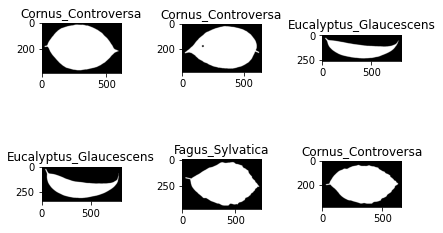

In [32]:
# Testing
img_test = LoadLeafImage('Test')
img_test_thresh = ThresholdLeafImage(img_test)
img_test_close = CloseLeafImage(img_test_thresh)
img_test_contour = FindLeafImageContour(img_test_close)
img_test_area = ExtractLeafImageFeaturesArea(img_test_contour)
img_test_perimeter = ExtractLeafImageFeaturesPerimeter(img_test_contour)

result = []
for i in range(0, len(img_test)):
  dist = CalculateDistance(
    img_test_area[i],
    img_test_perimeter[i],
    Cornus_Controversa_Average_Area,
    Eucalyptus_Glaucescens_Average_Area,
    Fagus_Sylvatica_Average_Area,
    Cornus_Controversa_Average_Perimeter,
    Eucalyptus_Glaucescens_Average_Perimeter,
    Fagus_Sylvatica_Average_Perimeter)

  result.append(dist)

  plt.subplot(2,3,i+1),plt.imshow(img_test[i], cmap='gray')
  plt.title(result[i])

plt.tight_layout()
plt.show()